In [1]:
import tensorflow as tf
(i_train, o_train), (i_test, o_test) = tf.keras.datasets.mnist.load_data(path="mnist.npz")

11501568/11490434 [==============================] - 0s 0us/step


In [2]:
print(i_train.shape)
print(i_test.shape)

(60000, 28, 28)
(10000, 28, 28)


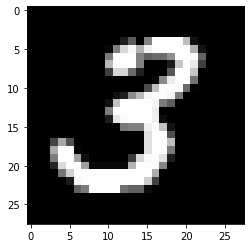

In [3]:
import matplotlib.pyplot as plt
i = 255
plt.imshow(i_train[i],cmap='gray')
plt.show()

In [4]:
o_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [5]:
i_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [6]:
i_train = i_train/255
i_test = i_test/255

In [7]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape = i_train[0].shape))
model.add(tf.keras.layers.Dense(784,activation = 'relu'))
model.add(tf.keras.layers.Dense(10,activation = 'softmax'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 784)               615440    
                                                                 
 dense_1 (Dense)             (None, 10)                7850      
                                                                 
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(optimizer = 'adam' , loss = 'sparse_categorical_crossentropy' , metrics = ['accuracy'])

In [10]:
model.fit(i_train,o_train,epochs=30)

Epoch 1/30
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1913 - accuracy: 0.9435
Epoch 2/30
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0758 - accuracy: 0.9766
Epoch 3/30
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0494 - accuracy: 0.9841
Epoch 4/30
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0347 - accuracy: 0.9887
Epoch 5/30
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0248 - accuracy: 0.9919
Epoch 6/30
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0203 - accuracy: 0.9933
Epoch 7/30
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0170 - accuracy: 0.9945
Epoch 8/30
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0148 - accuracy: 0.9950
Epoch 9/30
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0129 - accuracy: 0.9958
Epoch 10/30
1875/1875 [==============================] - 13s 7ms/step - 

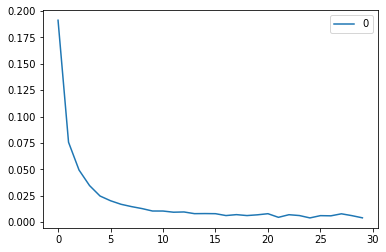

In [11]:
import pandas as pd
loss = pd.DataFrame(model.history.history['loss']).plot()

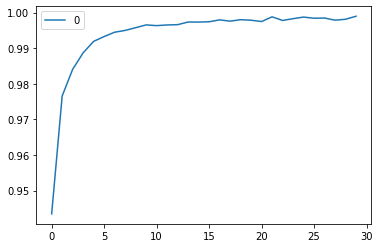

In [12]:
import pandas as pd
acc = pd.DataFrame(model.history.history['accuracy']).plot()

In [13]:
import numpy as np
o_pred = model.predict(i_test)
o_pred = np.argmax(o_pred,axis=1)
o_pred

array([7, 2, 1, ..., 4, 5, 6])

In [14]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(o_test,o_pred)

0.9784

In [15]:
model.save('Digit_Reconizer..hdf5')